In [16]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import math
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt


In [3]:
sub_1 = pd.read_csv('Downloads/ExtraSensory/0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv')
print(sub_1.shape)
#print(sub_1.loc[:,'label:LYING_DOWN':'label:WITH_FRIENDS'])

(3960, 278)


In [6]:
labels_only = sub_1.loc[:,'label:LYING_DOWN':'label:WITH_FRIENDS']
print(labels_only.shape)

goodRows = labels_only
prevRow = goodRows.loc[0]
#print(prevRow[0])
for row in goodRows.itertuples(index = True):
    keep = False
    if(row.Index != 0):
        for i in range(1,51):
            if((row[i] != prevRow[i]) & (prevRow[i]==1 | (row[i]==1))):
                #print(row[i])
                #print(prevRow[i])
                keep = True
        if(keep == False):
            goodRows = goodRows.drop(row.Index)
        keep = False
    
    prevRow = row
print(goodRows.shape)


(3960, 51)
(115, 51)


NameError: name 'np' is not defined

[  3.  22.  16.   1.   0.   3.   0.   0.   0.   0.   1.   1.   0.   0.   0.
   0.  12.   0.   0.   1.   0.   0.   0.   0.   4.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  13.   0.   9.   2.   0.   1.   0.   2.   2.   0.  17.
   7.   0.   0.   1.   0.  15.]


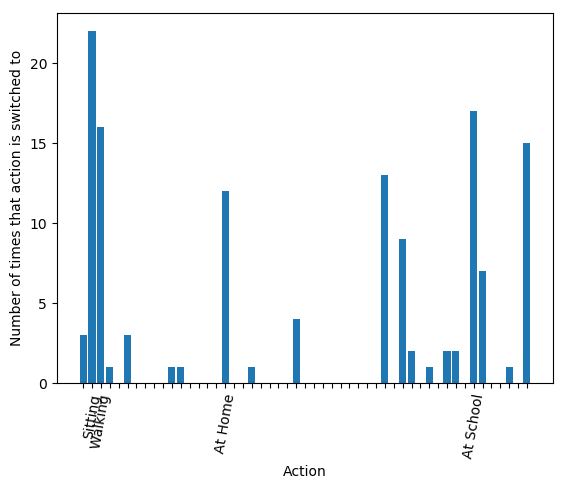

[  0.  22.  16.   1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
   0.  12.   0.   0.   1.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   3.   0.   1.   1.   0.   0.   0.   1.   1.   0.  10.
   4.   0.   0.   0.   0.   4.]


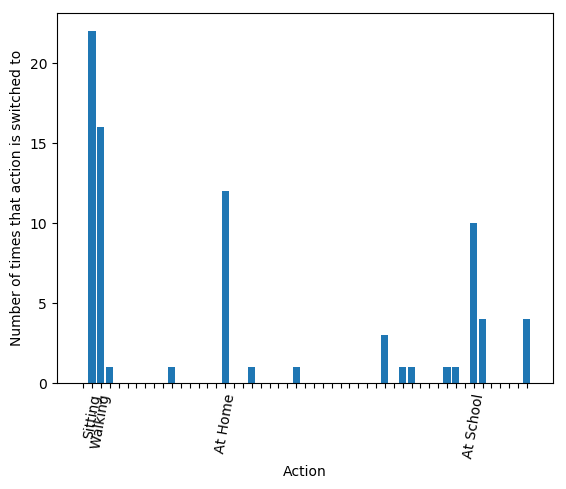

In [41]:
numTimesChanged = np.zeros(51)
for i in range(51):
    for j in range(114):
        if (goodRows.iloc[j,i] == 0) & (goodRows.iloc[j+1,i] == 1):
            numTimesChanged[i] += 1
print(numTimesChanged)
plt.bar(np.arange(51), numTimesChanged)
plt.xlabel('Action')
plt.ylabel('Number of times that action is switched to')
xlabels = ['' for x in range(51)]
xlabels[1] = "Sitting"
xlabels[2] = "Walking"
xlabels[16] = "At Home"
xlabels[44] = "At School"
xtickPoints = range(51)
plt.xticks(xtickPoints,xlabels, rotation = 80)
plt.show()

numTimesChangedNotOneTwoSixteen = np.zeros(51)
k = 0
for i in range(51):
    for j in range(114):
        oneChanged = (goodRows.iloc[j,1]!=goodRows.iloc[j+1,1])&(goodRows.iloc[j+1,1]==1)
        twoChanged = (goodRows.iloc[j,2]!=goodRows.iloc[j+1,2])&(goodRows.iloc[j+1,2]==1)
        sixteenChanged = (goodRows.iloc[j,16]==goodRows.iloc[j+1,16])&(goodRows.iloc[j+1,16]==1)
        if (goodRows.iloc[j,i]==0)&(goodRows.iloc[j+1,i]==1) & (oneChanged==False) & (twoChanged==False) & (sixteenChanged==False):
            numTimesChangedNotOneTwoSixteen[i] += 1
numTimesChangedNotOneTwoSixteen[1]=numTimesChanged[1]
numTimesChangedNotOneTwoSixteen[2]=numTimesChanged[2]
numTimesChangedNotOneTwoSixteen[16]=numTimesChanged[16]
print(numTimesChangedNotOneTwoSixteen)
plt.bar(np.arange(51), numTimesChangedNotOneTwoSixteen)
plt.xlabel('Action')
plt.ylabel('Number of times that action is switched to')
xlabels = ['' for x in range(51)]
xlabels[1] = "Sitting"
xlabels[2] = "Walking"
xlabels[16] = "At Home"
xlabels[44] = "At School"
xtickPoints = range(51)
plt.xticks(xtickPoints,xlabels, rotation = 80)
plt.show()

In [5]:
changedTo = goodRows
nextRow = changedTo.loc[0]
k = 1
for row in changedTo.itertuples(index = True):
    for i in range(1, 51):
        if((row[i] != nextRow[i]) & (nextRow[i]==1)):
            for j in range(1, 51):
                if(row[j] == 1 & (row[j] != row[i])):
                    row[j] = i